In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Our Bitcoin Data from Kaggle:

In [71]:
df_bit_raw = pd.read_csv('BTC-USD.csv')
df_bit_raw['Date'] = pd.to_datetime(df_bit_raw['Date'])

df_bit_raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074
3226,2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269
3227,2023-07-19,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269


S&P 500 Index USA:

https://www.marketwatch.com/investing/index/spx/download-data?startDate=9/17/2014&endDate=7/20/2015

In [72]:
df_sp_raw = pd.read_csv('INDEX_US_S&P US_SPX.csv')
df_sp_raw = df_sp_raw[::-1].reset_index(drop=True)
df_sp_raw['Date'] = pd.to_datetime(df_sp_raw['Date'])

df_sp_raw

,Date,Open,High,Low,Close
0,2014-09-17,1999.30,2010.74,1993.29,2001.57
1,2014-09-18,2003.07,2012.34,2003.07,2011.36
2,2014-09-19,2012.74,2019.26,2006.59,2010.40
3,2014-09-22,2009.08,2009.08,1991.01,1994.29
4,2014-09-23,1992.78,1995.41,1982.77,1982.77
...,...,...,...,...,...
2220,2023-07-14,4514.61,4527.76,4499.56,4505.42
2221,2023-07-17,4508.86,4532.85,4504.90,4522.79
2222,2023-07-18,4521.78,4562.30,4514.59,4554.98
2223,2023-07-19,4563.87,4578.43,4557.48,4565.72


Value of gold USD:

https://www.gold.org/goldhub/data/gold-prices#registration-type=google&just-verified=1

In [73]:
df_gd_raw = pd.read_csv('Gold.csv')
df_gd_raw['Date'] = pd.to_datetime(df_gd_raw['Date'])

df_gd_raw

,Date,USD
0,2014-09-17,1236.0
1,2014-09-18,1220.5
2,2014-09-19,1219.8
3,2014-09-22,1213.5
4,2014-09-23,1222.0
...,...,...
2302,2023-07-14,1953.7
2303,2023-07-17,1949.6
2304,2023-07-18,1975.0
2305,2023-07-19,1975.4


This data set does not have all days of the year, therefore the following will dectect which days are missing, create an index for it, and will replicate the former's day value into it.

In [74]:
j = 0
while j < 3:
    missing_dates = df_bit_raw[~df_bit_raw['Date'].isin(df_sp_raw['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_sp_raw.loc[df_sp_raw['Date'] == prev_date, ['Open', 'High', 'Low', 'Close']].values
        if len(prev_values) > 0:
            prev_value1, prev_value2, prev_value3, prev_value4 = prev_values[0]
            new_row = {'Date': date, 'Open': prev_value1, 'High': prev_value2, 'Low': prev_value3, 'Close': prev_value4}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_sp_raw = pd.concat([df_sp_raw, df_to_append], ignore_index=True)
    df_sp_raw['Date'] = pd.to_datetime(df_sp_raw['Date'])
    df_sp_raw = df_sp_raw.sort_values('Date')
    df_sp_raw = df_sp_raw.reset_index(drop=True)
    j += 1
df_sp_raw

,Date,Open,High,Low,Close
0,2014-09-17,1999.30,2010.74,1993.29,2001.57
1,2014-09-18,2003.07,2012.34,2003.07,2011.36
2,2014-09-19,2012.74,2019.26,2006.59,2010.40
3,2014-09-20,2012.74,2019.26,2006.59,2010.40
4,2014-09-21,2012.74,2019.26,2006.59,2010.40
...,...,...,...,...,...
3224,2023-07-16,4514.61,4527.76,4499.56,4505.42
3225,2023-07-17,4508.86,4532.85,4504.90,4522.79
3226,2023-07-18,4521.78,4562.30,4514.59,4554.98
3227,2023-07-19,4563.87,4578.43,4557.48,4565.72


In [75]:
j = 0
while j < 3:
    missing_dates = df_bit_raw[~df_bit_raw['Date'].isin(df_gd_raw['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_gd_raw.loc[df_gd_raw['Date'] == prev_date, 'USD'].values
        if len(prev_values) > 0:
            prev_value1 = prev_values[0]
            new_row = {'Date': date, 'USD': prev_value1}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_gd_raw = pd.concat([df_gd_raw, df_to_append], ignore_index=True)
    df_gd_raw['Date'] = pd.to_datetime(df_gd_raw['Date'])
    df_gd_raw = df_gd_raw.sort_values('Date')
    df_gd_raw = df_gd_raw.reset_index(drop=True)
    j += 1
df_gd_raw

,Date,USD
0,2014-09-17,1236.0
1,2014-09-18,1220.5
2,2014-09-19,1219.8
3,2014-09-20,1219.8
4,2014-09-21,1219.8
...,...,...
3224,2023-07-16,1953.7
3225,2023-07-17,1949.6
3226,2023-07-18,1975.0
3227,2023-07-19,1975.4


As we want the data to predict the bitcoin value, the following changes the indexation of the data.

In [76]:
df_bit_raw['Volume'] = df_bit_raw['Volume'].shift(+1)
df_bit_raw = df_bit_raw.drop(df_bit_raw.index[0])
df_bit_raw = df_bit_raw.reset_index(drop=True)
df_gd_raw = df_gd_raw.drop(df_gd_raw.index[-1])
df_sp_raw = df_sp_raw.drop(df_sp_raw.index[-1])


Now, a new Data Frame with the data that will be used is created.

In [77]:
df_sp_raw = df_sp_raw.rename(columns={'Close': 'S&P 500 (USD)'})
df_bit_raw = df_bit_raw.rename(columns={'Adj Close': 'Bitcoin (USD)', 'Volume' : 'Volume Bitcoin'})
df_gd_raw = df_gd_raw.rename(columns={'USD': 'Gold (USD)'})

df = pd.concat([df_sp_raw['Date'], df_bit_raw['Bitcoin (USD)'], df_bit_raw['Volume Bitcoin'], df_sp_raw['S&P 500 (USD)'], df_gd_raw['Gold (USD)']], axis=1)

df['Date'] = (df['Date'] - pd.to_datetime('2014-09-17')).dt.days

df

,Date,Bitcoin (USD),Volume Bitcoin,S&P 500 (USD),Gold (USD)
0,0,424.440002,2.105680e+07,2001.57,1236.0
1,1,394.795990,3.448320e+07,2011.36,1220.5
2,2,408.903992,3.791970e+07,2010.40,1219.8
3,3,398.821014,3.686360e+07,2010.40,1219.8
4,4,402.152008,2.658010e+07,2010.40,1219.8
...,...,...,...,...,...
3223,3223,30249.132813,8.011668e+09,4505.42,1953.7
3224,3224,30145.888672,8.516564e+09,4505.42,1953.7
3225,3225,29856.562500,1.324016e+10,4522.79,1949.6
3226,3226,29856.562500,1.313890e+10,4554.98,1975.0


The following measure the correlation between the data.

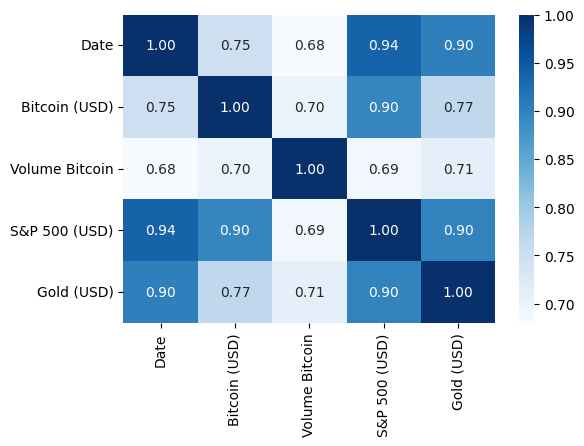

In [78]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2f");

Now, the ridge model will be built, trained and validated:

In [79]:
train, test = train_test_split(df, test_size=0.4, shuffle=True)

X_train = train.loc[:, train.columns != 'Bitcoin (USD)']
Y_train = train.loc[:, ['Bitcoin (USD)']]

X_test = test.loc[:, test.columns != 'Bitcoin (USD)']
Y_test = test.loc[:, ['Bitcoin (USD)']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 20)
param_grid = {'alpha': alphas}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)

best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, Y_train)

Y_pred = ridge_model.predict(X_test_scaled)

print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test, Y_pred):.3f}%')
print(f'Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred):.3f}')
print(f'R2 Score: {r2_score(Y_test, Y_pred):.3f}')

Best Alpha: 0.6951927961775606
Mean Absolute Percentage Error: 2.275%
Mean Absolute Error: 3656.485
R2 Score: 0.899


Prediction example:

In [80]:
X_new = pd.read_csv('Prediction.csv')
X_new['Date'] = pd.to_datetime(X_new['Date'])
X_new['Date'] = (X_new['Date'] - pd.to_datetime('2014-09-17')).dt.days
X_new_scaled = scaler.transform(X_new)

Y_pred = ridge_model.predict(X_new_scaled)
sY_pred = np.round(Y_pred, 2).item()
fY_pred = float(sY_pred)
print("Bitcoin value tomorrow:")
print('US$ ' + str(fY_pred))

Bitcoin value tomorrow:
US$ 27517.9


Preparing data for testing the model:

In [81]:
df_sp = pd.read_csv('S&P test.csv')
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

df_sp

,Date,S&P 500 (USD)
0,2023-11-10,4415.24
1,2023-11-09,4347.35
2,2023-11-08,4382.78
3,2023-11-07,4378.38
4,2023-11-06,4365.98
...,...,...
75,2023-07-27,4537.41
76,2023-07-26,4566.75
77,2023-07-25,4567.46
78,2023-07-24,4554.64


In [82]:
df_bit = pd.read_csv('Bitcoin test.csv')
df_bit['Date'] = pd.to_datetime(df_bit['Date'])

df_bit

,Date,Price,Vol.
0,2023-11-10,37303.0,59560
1,2023-11-09,36700.5,115560
2,2023-11-08,35636.9,46330
3,2023-11-07,35426.1,53490
4,2023-11-06,35042.0,29810
...,...,...,...
108,2023-07-25,29228.6,29050
109,2023-07-24,29178.1,55730
110,2023-07-23,30085.9,23320
111,2023-07-22,29788.9,18470


In [83]:
df_gd = pd.read_csv('Gold test.csv')
df_gd['Date'] = pd.to_datetime(df_gd['Date'])

df_gd

,Date,Gold (USD)
0,2023-07-21,1960.6
1,2023-07-24,1960.0
2,2023-07-25,1958.7
3,2023-07-26,1966.3
4,2023-07-27,1945.4
...,...,...
76,2023-11-06,1984.6
77,2023-11-07,1960.7
78,2023-11-08,1959.4
79,2023-11-09,1957.5


In [84]:
j = 0
while j < 3:
    missing_dates = df_bit[~df_bit['Date'].isin(df_sp['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_sp.loc[df_sp['Date'] == prev_date, 'S&P 500 (USD)'].values
        if len(prev_values) > 0:
            prev_value1 = prev_values.flatten()[0]
            new_row = {'Date': date, 'S&P 500 (USD)': prev_value1}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_sp = pd.concat([df_sp, df_to_append], ignore_index=True)
    df_sp['Date'] = pd.to_datetime(df_sp['Date'])
    df_sp = df_sp.sort_values('Date')
    df_sp = df_sp.reset_index(drop=True)
    j += 1
df_sp

,Date,S&P 500 (USD)
0,2023-07-21,4536.34
1,2023-07-22,4536.34
2,2023-07-23,4536.34
3,2023-07-24,4554.64
4,2023-07-25,4567.46
...,...,...
108,2023-11-06,4365.98
109,2023-11-07,4378.38
110,2023-11-08,4382.78
111,2023-11-09,4347.35


In [85]:
j = 0
while j < 3:
    missing_dates = df_bit[~df_bit['Date'].isin(df_gd['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_gd.loc[df_gd['Date'] == prev_date, 'Gold (USD)'].values
        if len(prev_values) > 0:
            prev_value1 = prev_values.flatten()[0]
            new_row = {'Date': date, 'Gold (USD)': prev_value1}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_gd = pd.concat([df_gd, df_to_append], ignore_index=True)
    df_gd['Date'] = pd.to_datetime(df_gd['Date'])
    df_gd = df_gd.sort_values('Date')
    df_gd = df_gd.reset_index(drop=True)
    j += 1
df_gd

,Date,Gold (USD)
0,2023-07-21,1960.6
1,2023-07-22,1960.6
2,2023-07-23,1960.6
3,2023-07-24,1960.0
4,2023-07-25,1958.7
...,...,...
108,2023-11-06,1984.6
109,2023-11-07,1960.7
110,2023-11-08,1959.4
111,2023-11-09,1957.5


Test DataFrame:

In [86]:
df_bit['Vol.'] = df_bit['Vol.'].shift(+1)
df_bit = df_bit.drop(df_bit.index[0])
df_bit = df_bit.reset_index(drop=True)
df_gd = df_gd.drop(df_gd.index[-1])
df_sp = df_sp.drop(df_sp.index[-1])

df_bit = df_bit.rename(columns={'Price': 'Bitcoin (USD)', 'Vol.' : 'Volume Bitcoin'})

df_test = pd.concat([df_gd['Date'], df_bit['Volume Bitcoin'], df_sp['S&P 500 (USD)'], df_gd['Gold (USD)']], axis=1)

df_test['Date'] = (df_test['Date'] - pd.to_datetime('2014-09-17')).dt.days

df_test

,Date,Volume Bitcoin,S&P 500 (USD),Gold (USD)
0,3229,59560.0,4536.34,1960.6
1,3230,115560.0,4536.34,1960.6
2,3231,46330.0,4536.34,1960.6
3,3232,53490.0,4554.64,1960.0
4,3233,29810.0,4567.46,1958.7
...,...,...,...,...
107,3336,44330.0,4358.34,1994.5
108,3337,29050.0,4365.98,1984.6
109,3338,55730.0,4378.38,1960.7
110,3339,23320.0,4382.78,1959.4


Bitcoin test values predicted:

In [87]:
df_scaled = scaler.transform(df_test)
Y_pred = ridge_model.predict(df_scaled)
Y_pred = pd.DataFrame(Y_pred)
Y_pred = Y_pred.rename(columns={0: 'Predicted Bitcoin (USD)'})
Y_pred

,Predicted Bitcoin (USD)
0,32147.767597
1,32134.750809
2,32121.713811
3,32641.799843
4,33005.484435
...,...
107,25465.015370
108,25710.154058
109,26145.041872
110,26264.454375


Assembling both predicted Bitcoin value and the actual Bitcoin value:

In [88]:
Comp = pd.DataFrame()
sample = pd.DataFrame()

Comp['Date'] = df_gd['Date']
Comp['Predicted Bitcoin (USD)'] = Y_pred['Predicted Bitcoin (USD)']
Comp['Bitcoin (USD)'] = df_bit['Bitcoin (USD)'].iloc[::-1].reset_index(drop=True)

Comp

,Date,Predicted Bitcoin (USD),Bitcoin (USD)
0,2023-07-21,32147.767597,29903.1
1,2023-07-22,32134.750809,29788.9
2,2023-07-23,32121.713811,30085.9
3,2023-07-24,32641.799843,29178.1
4,2023-07-25,33005.484435,29228.6
...,...,...,...
107,2023-11-05,25465.015370,35019.4
108,2023-11-06,25710.154058,35042.0
109,2023-11-07,26145.041872,35426.1
110,2023-11-08,26264.454375,35636.9


Ploting both values:

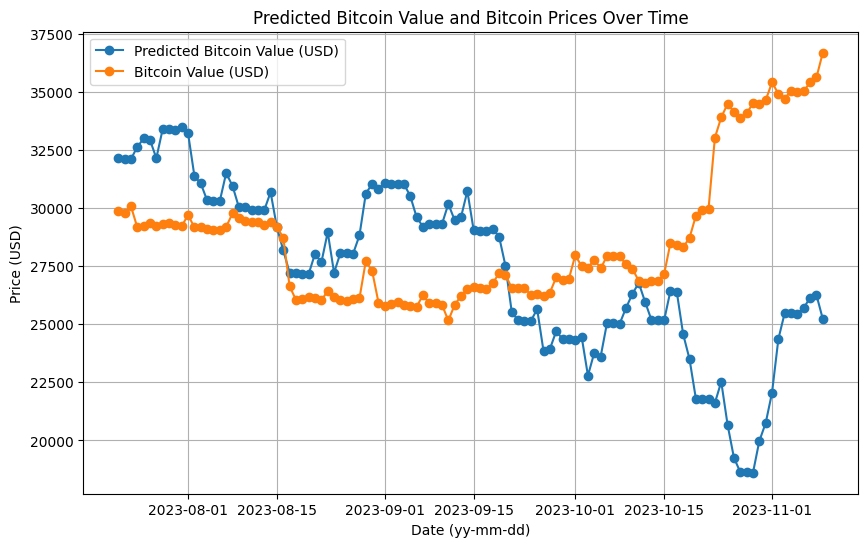

In [90]:
Comp['Date'] = pd.to_datetime(Comp['Date'])
plt.figure(figsize=(10, 6))

plt.plot(Comp['Date'], Comp['Predicted Bitcoin (USD)'], label='Predicted Bitcoin Value (USD)', marker='o')
plt.plot(Comp['Date'], Comp['Bitcoin (USD)'], label='Bitcoin Value (USD)', marker='o')

plt.title('Predicted Bitcoin Value and Bitcoin Prices Over Time')
plt.xlabel('Date (yy-mm-dd)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()